<h1 align="center">Python Performace</h1>

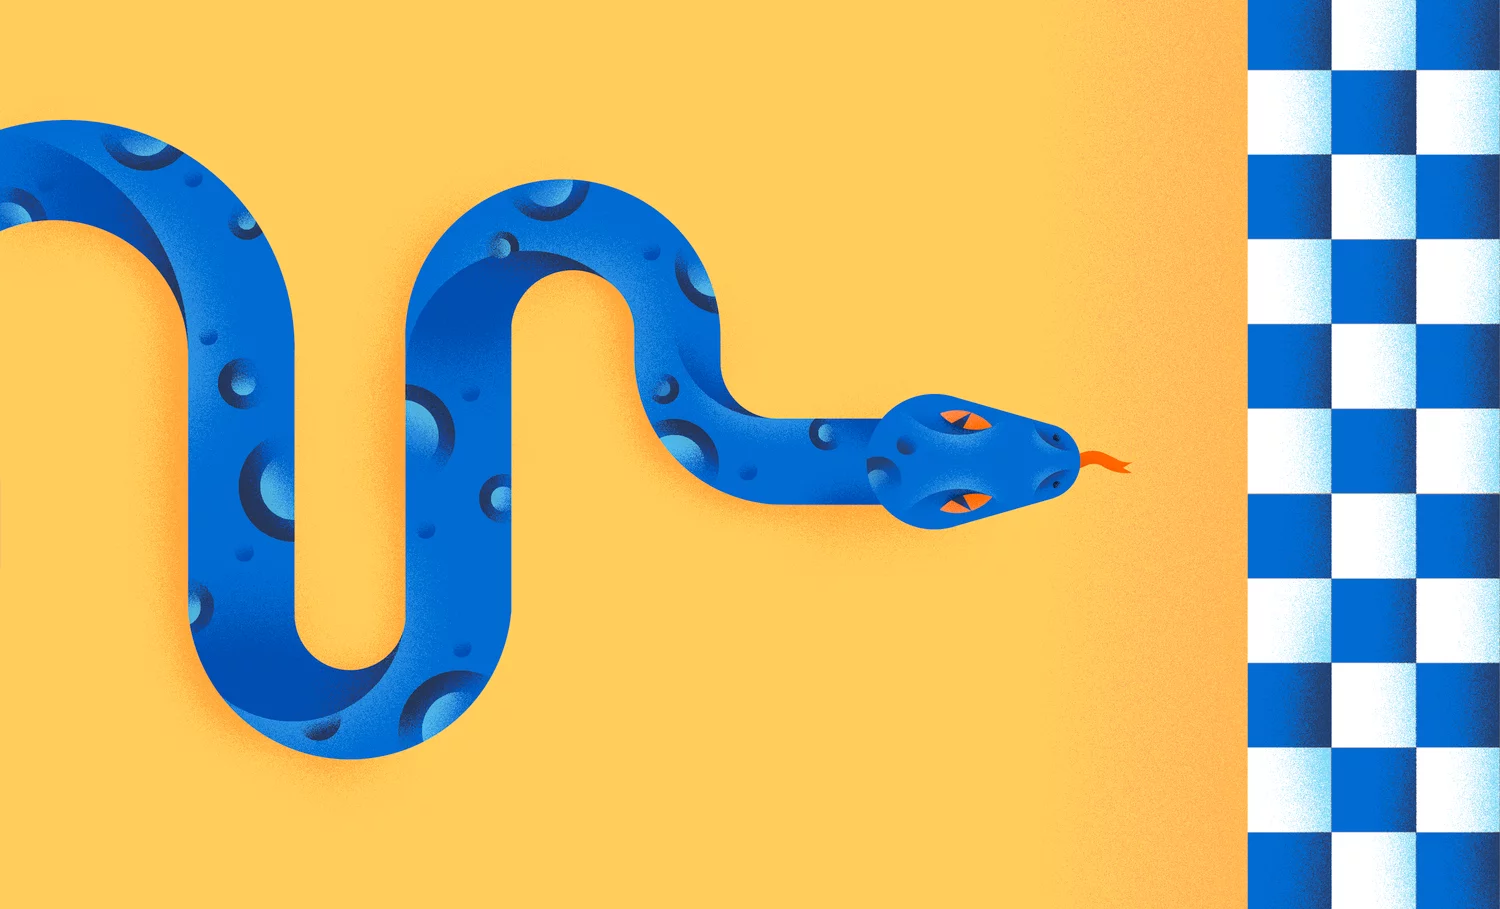

As soon as your code stops being trivial and runs on real-world data volumes, you will run into performance issues. You’ve heard that Python is slow, so it must be the culprit!

Not so fast!

#### But Why?
- Python is Dynamically Typed rather than Statically Typed.
- Python is interpreted rather than compiled.
- Python's object model can lead to inefficient memory access.

#### So Why Use Python?
- Easy to Learn and Use
- Readable and Maintainable Code
- Large standard library
- Improved Productivity.
- Many Open Source Frameworks and Tools.
- Portability.

>With the great power comes great responsibility
>
> __<cite>Spiderman</cite>

**What to do?**

# Profiling and Timing Code

Sometimes it's useful to check the execution time of a given command or set of commands; other times it's useful to dig into a multiline process and determine where the bottleneck lies in some complicated series of operations.
IPython provides access to a wide array of functionality for this kind of timing and profiling of code.
Here we'll discuss the following IPython magic commands:

- ``%time``: Time the execution of a single statement
- ``%timeit``: Time repeated execution of a single statement for more accuracy
- ``%prun``: Run code with the profiler
- ``%lprun``: Run code with the line-by-line profiler
- ``%memit``: Measure the memory use of a single statement
- ``%mprun``: Run code with the line-by-line memory profiler

The last four commands are not bundled with IPython–you'll need to get the ``line_profiler`` and ``memory_profiler`` extensions, which we will discuss in the following sections.

## Timing Code Snippets: ``%timeit`` and ``%time``

We saw the ``%timeit`` line-magic and ``%%timeit`` cell-magic in the introduction to magic functions in [IPython Magic Commands](01.03-Magic-Commands.ipynb); it can be used to time the repeated execution of snippets of code:

In [89]:
%timeit sum(range(100))

1.48 µs ± 51.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Note that because this operation is so fast, ``%timeit`` automatically does a large number of repetitions.
For slower commands, ``%timeit`` will automatically adjust and perform fewer repetitions:

In [90]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

596 ms ± 3.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Sometimes repeating an operation is not the best option.
For example, if we have a list that we'd like to sort, we might be misled by a repeated operation.
Sorting a pre-sorted list is much faster than sorting an unsorted list, so the repetition will skew the result:

In [91]:
import random
L = [random.random() for i in range(100000)]
%timeit L.sort()

1.19 ms ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For this, the ``%time`` magic function may be a better choice. It also is a good choice for longer-running commands, when short, system-related delays are unlikely to affect the result.
Let's time the sorting of an unsorted and a presorted list:

In [92]:
import random
L = [random.random() for i in range(100000)]
print("sorting an unsorted list:")
%time L.sort()

sorting an unsorted list:
CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 35.5 ms


In [93]:
print("sorting an already sorted list:")
%time L.sort()

sorting an already sorted list:
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.79 ms


Notice how much faster the presorted list is to sort, but notice also how much longer the timing takes with ``%time`` versus ``%timeit``, even for the presorted list!
This is a result of the fact that ``%timeit`` does some clever things under the hood to prevent system calls from interfering with the timing.
For example, it prevents cleanup of unused Python objects (known as *garbage collection*) which might otherwise affect the timing.
For this reason, ``%timeit`` results are usually noticeably faster than ``%time`` results.

For ``%time`` as with ``%timeit``, using the double-percent-sign cell magic syntax allows timing of multiline scripts:

In [94]:
%%time
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

CPU times: user 688 ms, sys: 0 ns, total: 688 ms
Wall time: 723 ms


For more information on ``%time`` and ``%timeit``, as well as their available options, use the IPython help functionality (i.e., type ``%time?`` at the IPython prompt).

## Profiling Full Scripts: ``%prun``

A program is made of many single statements, and sometimes timing these statements in context is more important than timing them on their own.
Python contains a built-in code profiler (which you can read about in the Python documentation), but IPython offers a much more convenient way to use this profiler, in the form of the magic function ``%prun``.

By way of example, we'll define a simple function that does some calculations:

In [95]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

Now we can call ``%prun`` with a function call to see the profiled results:

In [96]:
%prun sum_of_lists(1000000)

In the notebook, the output is printed to the pager, and looks something like this:

```
14 function calls in 0.714 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.599    0.120    0.599    0.120 <ipython-input-19>:4(<listcomp>)
        5    0.064    0.013    0.064    0.013 {built-in method sum}
        1    0.036    0.036    0.699    0.699 <ipython-input-19>:1(sum_of_lists)
        1    0.014    0.014    0.714    0.714 <string>:1(<module>)
        1    0.000    0.000    0.714    0.714 {built-in method exec}
```

The result is a table that indicates, in order of total time on each function call, where the execution is spending the most time. In this case, the bulk of execution time is in the list comprehension inside ``sum_of_lists``.
From here, we could start thinking about what changes we might make to improve the performance in the algorithm.

For more information on ``%prun``, as well as its available options, use the IPython help functionality (i.e., type ``%prun?`` at the IPython prompt).

## Line-By-Line Profiling with ``%lprun``

The function-by-function profiling of ``%prun`` is useful, but sometimes it's more convenient to have a line-by-line profile report.
This is not built into Python or IPython, but there is a ``line_profiler`` package available for installation that can do this.
Start by using Python's packaging tool, ``pip``, to install the ``line_profiler`` package:

```
$ pip install line_profiler
```

Next, you can use IPython to load the ``line_profiler`` IPython extension, offered as part of this package:

In [97]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Now the ``%lprun`` command will do a line-by-line profiling of any function–in this case, we need to tell it explicitly which functions we're interested in profiling:

In [98]:
%lprun -f sum_of_lists sum_of_lists(5000)

As before, the notebook sends the result to the pager, but it looks something like this:

```
Timer unit: 1e-06 s

Total time: 0.009382 s
File: <ipython-input-19-fa2be176cc3e>
Function: sum_of_lists at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def sum_of_lists(N):
     2         1            2      2.0      0.0      total = 0
     3         6            8      1.3      0.1      for i in range(5):
     4         5         9001   1800.2     95.9          L = [j ^ (j >> i) for j in range(N)]
     5         5          371     74.2      4.0          total += sum(L)
     6         1            0      0.0      0.0      return total
```

The information at the top gives us the key to reading the results: the time is reported in microseconds and we can see where the program is spending the most time.
At this point, we may be able to use this information to modify aspects of the script and make it perform better for our desired use case.

For more information on ``%lprun``, as well as its available options, use the IPython help functionality (i.e., type ``%lprun?`` at the IPython prompt).

## Profiling Memory Use: ``%memit`` and ``%mprun``

Another aspect of profiling is the amount of memory an operation uses.
This can be evaluated with another IPython extension, the ``memory_profiler``.
As with the ``line_profiler``, we start by ``pip``-installing the extension:

```
$ pip install memory_profiler
```

Then we can use IPython to load the extension:

In [99]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


The memory profiler extension contains two useful magic functions: the ``%memit`` magic (which offers a memory-measuring equivalent of ``%timeit``) and the ``%mprun`` function (which offers a memory-measuring equivalent of ``%lprun``).
The ``%memit`` function can be used rather simply:

In [109]:
%memit sum_of_lists(1000000)

peak memory: 239.43 MiB, increment: 25.21 MiB


We see that this function uses about 100 MB of memory.

For a line-by-line description of memory use, we can use the ``%mprun`` magic.
Unfortunately, this magic works only for functions defined in separate modules rather than the notebook itself, so we'll start by using the ``%%file`` magic to create a simple module called ``mprun_demo.py``, which contains our ``sum_of_lists`` function, with one addition that will make our memory profiling results more clear:

In [101]:
%%file mprun_demo.py
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
        del L # remove reference to L
    return total

Writing mprun_demo.py


We can now import the new version of this function and run the memory line profiler:

In [113]:
from mprun_demo import sum_of_lists
%mprun -f sum_of_lists sum_of_lists(10000)

The result, printed to the pager, gives us a summary of the memory use of the function, and looks something like this:
```
Filename: ./mprun_demo.py

Line #    Mem usage    Increment   Line Contents
================================================
     4     71.9 MiB      0.0 MiB           L = [j ^ (j >> i) for j in range(N)]


Filename: ./mprun_demo.py

Line #    Mem usage    Increment   Line Contents
================================================
     1     39.0 MiB      0.0 MiB   def sum_of_lists(N):
     2     39.0 MiB      0.0 MiB       total = 0
     3     46.5 MiB      7.5 MiB       for i in range(5):
     4     71.9 MiB     25.4 MiB           L = [j ^ (j >> i) for j in range(N)]
     5     71.9 MiB      0.0 MiB           total += sum(L)
     6     46.5 MiB    -25.4 MiB           del L # remove reference to L
     7     39.1 MiB     -7.4 MiB       return total
```
Here the ``Increment`` column tells us how much each line affects the total memory budget: observe that when we create and delete the list ``L``, we are adding about 25 MB of memory usage.
This is on top of the background memory usage from the Python interpreter itself.

For more information on ``%memit`` and ``%mprun``, as well as their available options, use the IPython help functionality (i.e., type ``%memit?`` at the IPython prompt).

## Visualize profiling
We can use snakeviz to visualize the results, which shows the name of the functions and time spent in each function.

SnakeViz is a viewer for Python profiling data that runs as a web application in your browser.

In [103]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [114]:
import time
import random

def very_slow_random_generator():
    time.sleep(5)
    arr = [random.randint(1,100) for i in range(100000)]
    return sum(arr) / len(arr)

def slow_random_generator():
    time.sleep(2)
    arr = [random.randint(1,100) for i in range(100000)]
    return sum(arr) / len(arr)

def fast_random_generator():
    time.sleep(1)
    arr = [random.randint(1,100) for i in range(100000)]
    return sum(arr) / len(arr)


def main_func():
    result = fast_random_generator()
    print(result)

    result = slow_random_generator()
    print(result)

    result = very_slow_random_generator()
    print(result)

%snakeviz main_func()

50.53638
50.52673
50.51897
 
*** Profile stats marshalled to file '/tmp/tmp2x8kgz6z'. 
Embedding SnakeViz in this document...


*Note: snakeviz is based on `cProfile` module it take generated profiling output and visualize them in the browser.*

# Speed up your Python Code 

For speeding up our python code, there are two ways the first one based on how our code should be what kind of algorithm we should use and the sweetable data structer also some tricks in python, where the second way is accelerating your code by advanced techniques using external modules.

## Best coding practices:
- **Use Proper algorithm & data structure:** Be smart and give some time choosing a fast engough algorithm, instead of bruteforcing, and peek up the right data structure for your algorithm, you may check this [python documents for time-complexity of python data structure](https://wiki.python.org/moin/TimeComplexity).
- **Using built-in functions and libraries:** Many of Python’s built-in functions are written in C, which makes them much faster than a pure python solution, remember the rule **DRY**. 
- **List Comprehensions:** are  very fast loops also they save us time, space and clearn up our code.
- **Lazy Module Importing:** import modules only when needed and avoid the overhead of loading them in when they aren’t necessary, also instead of importing the whole module while you need only one function from it, import it directly.
- **Try Multiprocessing:** Most modern consumer computers have 2–16 cores. Python is generally limited to a single core when processing code, but using the multiprocessing library allows us to take advantage of more than one, check this [link](https://docs.python.org/3/library/multiprocessing.html) for more.

## Accelerating python code

Unless you have to perform computationally heavy operations, Python’s speed is not usually a problem. This is where some advanced techniques come in handy.

While Python excels as a stand-alone language, it also shines as a glue language, a language that combines or ties together “chunks” of functionality from other languages or third-party libraries.

### Execute python code at the speed of C- Extending Python:

- C extensions are a way to code functions in C, compile them into a Python module and use them in your source code as a normal Python library.
- Many popular modules are actually written in C or C++ (e.g. numpy, pandas, tensorflow…) for better performance and/or low-level functionalities.

**Another major benefit of extension modules is that they run at the speed of compiled code, rather than the slower speed of interpreted Python code.**
![python vs c and python](../data/executing_time_python_c.png)

#### How to Build a C Extension:
- [ ] todo

### Accelerating Python code with Cython
Cython is an optimising static compiler for both the Python programming language and the extended Cython programming language (based on Pyrex).

**Cython gives you the combined power of Python and C to let you**
- easily tune readable Python code into plain C performance by adding static type declarations, also in Python syntax.
- interact efficiently with large data sets, e.g. using multi-dimensional NumPy arrays.
- quickly build your applications within the large, mature and widely used CPython ecosystem.
- integrate natively with existing code and data from legacy, low-level or high-performance libraries and applications.
- and much more features

**How Cython Is Different**
Cython is a programming language based on Python with extra syntax to provide static type declarations. This takes advantage of the benefits of Python while allowing one to achieve the speed of C.

While dynamic typing comes with a performance cost in Python, statically-typed variables in Cython generally lead to faster code execution.

Performance gains are most significant in CPU-bound programs, notably in tight Python loops. By contrast, I/O bound programs are not expected to benefit much from a Cython implementation.

**How Cython works**

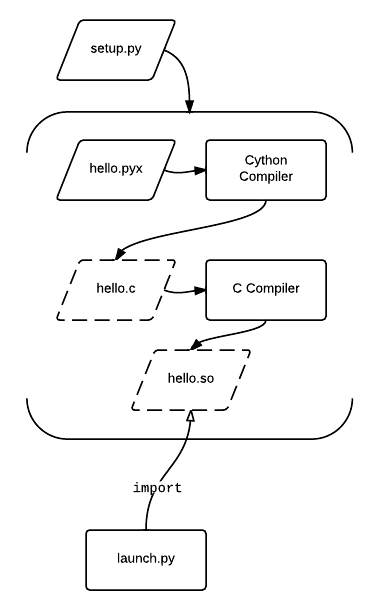

In this recipe, we will see how to accelerate the Mandelbrot code example with Cython.

1. Let's define some variables:

In [115]:
import numpy as np
size = 400
iterations = 100

2. To use Cython in the Jupyter Notebook, we first need to import the Cython Jupyter extension:

In [116]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


3. As a first try, let's just add the %%cython magic before the definition of the mandelbrot() function. Internally, this cell magic compiles the cell into a standalone Cython module, hence the need for all required imports to occur within the same cell. This cell does not have access to any variable or function defined in the interactive namespace:

In [117]:
%%cython -a
import numpy as np

def mandelbrot_cython(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

The **-a** option tells Cython to annotate lines of code with a background color indicating how optimized it is. The darker the color, the less optimized the line. The color depends on the relative number of Python API calls at each line. We can click on any line to see the generated C code. Here, this version does not appear to be optimized.

4.  How fast is this version?

In [118]:
s = (size, size)

In [119]:
%%timeit -n1 -r1
m = np.zeros(s, dtype=np.int32)
mandelbrot_cython(m, size, iterations)

12.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


We get virtually no speedup here. We need to specify the type of our Python variables.

5.  Let's add type information using typed memory views for NumPy arrays (we explain these in the How it works... section). We also use a slightly different way to test whether particles have escaped from the domain (if test):

In [120]:
%%cython -a
import numpy as np

def mandelbrot_cython(int[:,::1] m,
                      int size,
                      int iterations):
    cdef int i, j, n
    cdef complex z, c
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if z.real**2 + z.imag**2 <= 100:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

In [121]:
%%timeit -n1 -r1 m = np.zeros(s, dtype=np.int32)
mandelbrot_cython(m, size, iterations)

29.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


This version is almost 350 times faster than the first version!

All we have done is to specify the type of the local variables and function arguments, and bypass NumPy's np.abs() function when computing the absolute value of z. These changes have helped Cython generate more optimized C code from Python code.

**cdef declarations:**
```python
cdef int x,y,z
cdef char *s
cdef float x = 5.2 (single precision)
cdef double x = 40.5 (double precision)
cdef list languages
cdef dict abc_dict
cdef object thing
```
**def and cdef**
- `def` - regular python function, calls from Python only.
- `cdef` - cython only functions, can't access these from python-only code, must access within Cython, since there will be no C translation to Python for these.
- `cpdef` - C and Python. Will create a C function and a wrapper for Python.

In [122]:
def test(x):
    y = 0
    for i in range(x):
        y += i
    return y

In [123]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
%%cython -a
cpdef int test_cython(int x):
    cdef int y = 0
    cdef int i
    for i in range(x):
        y += i
    return y

In [125]:
%timeit x = test_cython(1000)

820 ns ± 26.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [126]:
%timeit x = test(1000)

88.6 µs ± 3.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### benefit from llvm optimizations using Numba
Numba is a just-in-time compiler of Python functions. It translates a Python function when it is called into a machine code equivalent that runs anywhere from 2x (simple NumPy operations) to 100x (complex Python loops) faster. In this notebook, we show some basic examples of using Numba.

In [127]:
import numpy as np
import numba
from numba import jit

Let's check which version of Numba we have:

In [128]:
print(numba.__version__)

0.53.0


Numba uses Python *decorators* to transform Python functions into functions that compile themselves.  The most common Numba decorator is `@jit`, which creates a normal function for execution on the CPU.

for more on decorators check this [link](https://realpython.com/primer-on-python-decorators/).

Numba works best on numerical functions that make use of NumPy arrays.  Here's an example:

In [129]:
@jit(nopython=True)
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    # assuming square input matrix
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

The `nopython=True` option requires that the function be fully compiled (so that the Python interpreter calls are completely removed), otherwise an exception is raised.  These exceptions usually indicate places in the function that need to be modified in order to achieve better-than-Python performance.  We strongly recommend always using `nopython=True`.

The function has not yet been compiled.  To do that, we need to call the function:

In [130]:
x = np.arange(100).reshape(10, 10)
go_fast(x)

array([[  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.],
       [ 19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.],
       [ 29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.],
       [ 39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.],
       [ 49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.],
       [ 59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.],
       [ 69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.],
       [ 79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.],
       [ 89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.],
       [ 99., 100., 101., 102., 103., 104., 105., 106., 107., 108.]])

In the first time the function was called, a new version of the function was compiled and executed.  If we call it again, the previously generated function executions without another compilation step.

In [131]:
go_fast(2*x)

array([[  9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.],
       [ 29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.],
       [ 49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,  67.],
       [ 69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.],
       [ 89.,  91.,  93.,  95.,  97.,  99., 101., 103., 105., 107.],
       [109., 111., 113., 115., 117., 119., 121., 123., 125., 127.],
       [129., 131., 133., 135., 137., 139., 141., 143., 145., 147.],
       [149., 151., 153., 155., 157., 159., 161., 163., 165., 167.],
       [169., 171., 173., 175., 177., 179., 181., 183., 185., 187.],
       [189., 191., 193., 195., 197., 199., 201., 203., 205., 207.]])

Let's compare to the uncompiled function.  Numba-compiled function have a special `.py_func` attribute which is the original uncompiled Python function.  We should first verify we get the same results:

In [132]:
np.testing.assert_array_equal(go_fast(x), go_fast.py_func(x))

To benchmark Numba-compiled functions, it is important to time them without including the compilation step, since the compilation of a given function will only happen once for each set of input types, but the function will be called many times.

In a notebook, the `%timeit` magic function is the best to use because it runs the function many times in a loop to get a more accurate estimate of the execution time of short functions.

Let's compare the speed of the Python vs numba version:

In [133]:
%timeit -r 7 -n 10000 go_fast.py_func(x) # python version

39.5 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [134]:
%timeit -r 7 -n 10000 go_fast(x) # numba version

1.59 µs ± 603 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The original Python function is more than nearby 40x slower than the Numba-compiled version.  However, the Numba function used explicit loops, which are very fast in Numba and not very fast in Python.  Our example function is so simple, we can create an alternate version of `go_fast` using only NumPy array expressions:

In [135]:
def go_numpy(a):
    return a + np.tanh(np.diagonal(a)).sum()

In [136]:
np.testing.assert_array_equal(go_numpy(x), go_fast(x))

In [137]:
%timeit -r 7 -n 10000 go_numpy(x)

16.1 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The NumPy version is more than 2x faster than Python, but still 10x slower than Numba.

### Supported Python Features

Numba works best when used with NumPy arrays, but Numba also supports other data types out of the box:

* `int`, `float`
* `tuple`, `namedtuple`
* `list` (with some restrictions)
* ... and others.  See the [Reference Manual](https://numba.pydata.org/numba-doc/latest/reference/pysupported.html) for more details.

In particular, tuples are useful for returning multiple values from functions:

In [138]:
import random

@jit(nopython=True)
def spherical_to_cartesian(r, theta, phi):
    '''Convert spherical coordinates (physics convention) to cartesian coordinates'''
    sin_theta = np.sin(theta)
    x = r * sin_theta * np.cos(phi)
    y = r * sin_theta * np.sin(phi)
    z = r * np.cos(theta)
    
    return x, y, z # return a tuple
    
@jit(nopython=True)
def random_directions(n, r):
    '''Return ``n`` 3-vectors in random directions with radius ``r``'''
    out = np.empty(shape=(n,3), dtype=np.float64)
    
    for i in range(n):
        # Pick directions randomly in solid angle
        phi = random.uniform(0, 2*np.pi)
        theta = np.arccos(random.uniform(-1, 1))
        # unpack a tuple
        x, y, z = spherical_to_cartesian(r, theta, phi)
        out[i] = x, y, z
    
    return out

In [139]:
random_directions(10, 1.0)

array([[-0.21190149, -0.88009666, -0.42488543],
       [ 0.67580227, -0.350893  ,  0.64820166],
       [-0.61620422, -0.7566177 , -0.21868243],
       [-0.40932114, -0.84909794, -0.33389954],
       [ 0.48618385,  0.26138666, -0.83384788],
       [-0.15504981,  0.85247935,  0.49923794],
       [-0.6904986 , -0.59326367, -0.41382351],
       [ 0.64031868, -0.2030058 ,  0.7407973 ],
       [-0.98743446,  0.12519719, -0.09643058],
       [-0.3159425 , -0.18051524, -0.93144757]])

When Numba is translating Python to machine code, it uses the [LLVM](https://llvm.org/) library to do most of the optimization and final code generation.  This automatically enables a wide range of optimizations that you don't even have to think about.  If we were to inspect the output of the compiler for the previous random directions example, we would find that:

* The function body for `spherical_to_cartesian()` was inlined directly into the body of the for loop in `random_directions`, eliminating the overhead of making a function call.
* The separate calls to `sin()` and `cos()` were combined into a single, faster call to an internal `sincos()` function.

These kinds of cross-function optimizations are one of the reasons that Numba can sometimes outperform compiled NumPy code.

#### NumPy Support in Numba

Numba is designed to be used with NumPy and complement its capabilities.  Numba supports:

* Passing NumPy arrays as arguments, including structured dtypes
* Creating compiled ufuncs and generalized ufuncs
* Using a large subset of NumPy functions in nopython mode

In [140]:
import numpy as np
import numba
from numba import jit

#### Numba Specialization by Dtype

Numba automatically uses multiple dispatch on compiled functions to allow different specialized implementations of the same function to be used.  Suppose we have a function that clamps values to zero if they are below a particular magnitude:

In [141]:
@jit(nopython=True)
def zero_clamp(x, threshold):
    # assume 1D array.  See later in this notebook for more general function
    out = np.empty_like(x)
    for i in range(out.shape[0]):
        if np.abs(x[i]) > threshold:
            out[i] = x[i]
        else:
            out[i] = 0
    return out        

In [142]:
a_small = np.linspace(0, 1, 50)
zero_clamp(a_small, 0.3)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

Now let's benchmark some different kinds of array inputs.  We'll try:

* int64
* float32
* float32 with a stride (elements not contiguous in memory)

In [143]:
n = 10000
a_int16 = np.arange(n).astype(np.int16)
a_float32 = np.linspace(0, 1, n, dtype=np.float32)
a_float32_strided = np.linspace(0, 1, 2*n, dtype=np.float32)[::2]  # view of every other element

In [144]:
%timeit zero_clamp(a_int16, 1600)
%timeit zero_clamp(a_float32, 0.3)
%timeit zero_clamp(a_float32_strided, 0.3)

46.7 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.1 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
39.1 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


We see different performance characteristics for each of these cases, even though they have the same number of input elements.  Numba generated different machine code for each situation, which we can see if we look at the `.signatures` attribute of the compiled function:

In [145]:
zero_clamp.signatures

[(array(float64, 1d, C), float64),
 (array(int16, 1d, C), int64),
 (array(float32, 1d, C), float64),
 (array(float32, 1d, A), float64)]

When printed as strings, Numba array types have the form: `array(dtype, dimensions, layout)`.  The first signature therefore corresponds to a 1D array of float64 with C style layout (row-major order, no gaps between elements).  The next two signatures are similar, but for `int16` and `float32` arrays.  The final signature indicates an "any" layout array, which usually happens when you slice an array, and it no longer has a C or FORTRAN memory layout.

We can compare to a pure NumPy implementation and see the speed improvement that Numba has achieved through a combination of specialization and elimination of temporary arrays:

In [146]:
def np_zero_clamp(x, threshold):
    return np.where(np.abs(x) > threshold, x, 0)

In [147]:
%timeit np_zero_clamp(a_int16, 1600)
%timeit np_zero_clamp(a_float32, 0.3)
%timeit np_zero_clamp(a_float32_strided, 0.3)

32.7 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
33.9 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
39.5 µs ± 334 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Creating Ufuncs

Universal functions, typically called "ufuncs" for short, are functions that broadcast an elementwise operation across input arrays of varying numbers of dimensions.  Most NumPy functions are ufuncs, and Numba makes it easy to compile custom ufuncs using the `@vectorize` decorator.

In [148]:
from numba import vectorize

In [149]:
@vectorize(nopython=True)
def ufunc_zero_clamp(x, threshold):
    if np.abs(x) > threshold:
        return x
    else:
        return 0

In [150]:
%timeit ufunc_zero_clamp(a_int16, 1600)
%timeit ufunc_zero_clamp(a_float32, 0.3)

28.7 µs ± 382 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
27.5 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Note that for this simple ufunc, Numba is not as fast as the function with the manual looping, and in some cases, is the same speed as the example that called NumPy directly.  This is not surprising as this function is very simple, and NumPy *also uses compiled ufuncs*.  Numba `@vectorize` is generally most effective when creating ufuncs that are not a simple combination of existing NumPy operations.

#### Calling NumPy functions

Numba supports many, but not all, NumPy functions.  Some functions also have limitations that prevent the use of some of the optional arguments in nopython mode.  A full description can be found in the [Supported NumPy Features](http://numba.pydata.org/numba-doc/dev/reference/numpysupported.html) page in the Numba Reference Manual.

Note that when using NumPy functions on arrays, Numba will also compile and optimize array expressions:

In [151]:
def numpy_mpe(x, true):
    return (((x - true)/true)**2).mean()

numba_mpe = jit(nopython=True)(numpy_mpe)  # using jit as a function rather than a decorator

We can confirm both versions give the same answer:

In [152]:
true_x = 0.1
x = np.random.normal(true_x, 1, size=100000)
numpy_mpe(x, true=true_x), numba_mpe(x, true=true_x)

(100.20377023049372, 100.20377023049359)

And see the Numba version is faster:

In [168]:
%timeit numpy_mpe(x, true=0.1)
%timeit numba_mpe(x, true=0.1)

473 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
427 µs ± 3.34 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


If the `scipy` package is installed, Numba will also automatically make use of the optimized BLAS/LAPACK implementation that SciPy was compiled with.  In the case of Anaconda, this is Intel MKL, but OpenBLAS is also common for builds of `scipy`.  (Note that Numba is not itself compiled and linked against any BLAS implementation.)  Most functions in `numpy.linalg` will be accelerated this way, as well as `numpy.dot`.

Numba will not run any faster than NumPy for individual linear algebra routines (since both translate to calls to the same underlying library), but you are able to use linear algebra calls inside your Numba-compiled functions without any loss of performance.

In [155]:
import numpy as np
import pandas as pd
from sklearn import datasets
from numba import jit, njit, prange
import math

In [156]:
digits = datasets.load_digits()
X = digits['data']
print(X.shape)

(1797, 64)


In [157]:
def func(X):
    Y = np.exp(-X)
    return Y

%timeit func(X)

2.22 ms ± 69.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [158]:
@njit
def njit_func(X):
    Y = np.exp(-X)
    return Y

In [159]:
%timeit njit_func(X)

2.08 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [160]:
def func(X):
    for i in range(10000):
        Y = np.exp(-X)
    return Y

%timeit func(X)

22.9 s ± 718 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [162]:
@njit
def njit_func(X):
    for i in prange(10000):
        Y = np.exp(-X)
    return Y

%timeit njit_func(X)

21.2 s ± 296 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [163]:
def hypotenuse(x, y):
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

%timeit hypotenuse(5.0, 12.0)

1.08 µs ± 90.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [164]:
@njit
def njit_hypotenuse(x, y):
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

%timeit njit_hypotenuse(5.0, 12.0)

380 ns ± 11.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [165]:
df = pd.DataFrame(data=[[2,4],[1,3]] , columns=['even', 'odd'])

In [166]:
@jit
def bad_example(x):
    return x['even']

bad_example(df)

0    2
1    1
Name: even, dtype: int64

In [167]:
@njit
def bad_example(x):
    return x['even']

bad_example(df)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at /tmp/ipykernel_407/1611056741.py (3)

File "../../../../../../tmp/ipykernel_407/1611056741.py", line 3:
<source missing, REPL/exec in use?>

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class 'pandas.core.frame.DataFrame'>
